In [1]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import word2vec

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
import wget
import zipfile

In [4]:
from sklearn.decomposition import TruncatedSVD

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
#model_url = 'http://vectors.nlpl.eu/repository/11/180.zip'
model_url = 'https://rusvectores.org/static/models/rusvectores4/news/news_upos_cbow_600_2_2018.vec.gz'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]
#model_file = '180.zip'
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

 14% [..........                                                            ]  85172224 / 573974743

KeyboardInterrupt: 

In [ ]:
from gensim.models import KeyedVectors
from gensim import models

word2vec_path = 'news_upos_cbow_600_2_2018.vec.gz'
w2v_model = models.KeyedVectors.load_word2vec_format(word2vec_path)

In [57]:
model = w2v_model

In [58]:
from tqdm import tqdm

In [59]:
import random

In [60]:
all_nouns = []
for w in tqdm(model.index_to_key):
    #print(w)
    if w.split('_')[-1] == 'NOUN':
        all_nouns.append(w)

100%|██████████████████████████████████████████████████████████████████████| 289191/289191 [00:00<00:00, 888030.09it/s]


In [61]:
len(all_nouns)

98853

In [10]:
#our_nouns = [random.choice(all_nouns) for i in range(1000)]

In [11]:
def get_matrix(all_nouns):
    vectors_of_words = np.zeros((len(all_nouns), model.vector_size))
    for i, word in enumerate(all_nouns):
        vectors_of_words[i] = model[word]
        
    return vectors_of_words

In [12]:
def lsa_matrix(vectors_of_words, n_components, n_iter=100):
    lsa_obj = TruncatedSVD(n_components=n_components, n_iter=n_iter, random_state=42)
    lsa_data = lsa_obj.fit_transform(vectors_of_words)
    return lsa_data
#Sigma = lsa_obj.singular_values_
#V_T = lsa_obj.components_.T

In [13]:
def sort_results(lsa_data, all_nouns):    
    sorted_scores_indx = np.argsort(lsa_data, axis=0)[::-1]
    result = np.array(all_nouns)[sorted_scores_indx.ravel()]
    result_nums = np.array(lsa_data)[sorted_scores_indx.ravel()]
    return result, result_nums

In [70]:
def get_n_iterations(all_nouns, iterations):
    dict_iters = {'0': [all_nouns]}
    for i in range(iterations):
        iter_name = str(i + 1)
        dict_iters[iter_name] = []
        for el in dict_iters[str(i)]:
            first_matrix = get_matrix(el)
            first_lsa = lsa_matrix(first_matrix, i + 1, 500)
            first_result, first_result_num = sort_results([v[-1] for v in first_lsa], el)
            half_of_list = len(first_result) // 2
            #print(dict_iters[iter_name])
            dict_iters[iter_name].append(first_result[:half_of_list])
            dict_iters[iter_name].append(first_result[half_of_list:])
    return dict_iters

In [71]:
%%time
dict_iters = get_n_iterations(all_nouns, 7)

Wall time: 17min 43s


In [76]:
for i in dict_iters['6'][40]:
    print(i)

нацобъединение_NOUN
райсобрание_NOUN
мерец_NOUN
соцпартия_NOUN
гистадрут_NOUN
дзинтарс_NOUN
бригманис_NOUN
иапл_NOUN
кэписп_NOUN
нди_NOUN
мособлизбирком_NOUN
сейм_NOUN
госфиннадзор_NOUN
доо_NOUN
авод_NOUN
фидес_NOUN
солвита_NOUN
батькивщинь_NOUN
ликуда_NOUN
инесе_NOUN
судраб_NOUN
демпартия_NOUN
центрист_NOUN
нацфинуслуга_NOUN
борданс_NOUN
икмо_NOUN
политформирование_NOUN
социалист_NOUN
горорганизация_NOUN
штайнмаер_NOUN
лейборист_NOUN
горсобрание_NOUN
исмон_NOUN
енд_NOUN
эйхенбаумс_NOUN
райсовет_NOUN
розиманнус_NOUN
госмиграция_NOUN
облкомитет_NOUN
шаса_NOUN
киевгорадминистрация_NOUN
рпа_NOUN
мингорсовет_NOUN
социал-демократ_NOUN
друвиета_NOUN
давудогл_NOUN
оринац::еркира_NOUN
сивец_NOUN
примар_NOUN
облорганизация_NOUN
еек_NOUN
фпу_NOUN
арем_NOUN
ареопаг_NOUN
шакед_NOUN
самопомич_NOUN
тнуа_NOUN
сопартиец_NOUN
демитерс_NOUN
правоцентрист_NOUN
киевгоргосадминистрация_NOUN
калматов_NOUN
профсоюзник_NOUN
янез_NOUN
захава_NOUN
реформист_NOUN
аугулис_NOUN
леноблизбирком_NOUN
нацсобрание_NOUN

In [45]:
len(dict_iters['6'])

64

## Итерация первая

In [17]:
first_matrix = get_matrix(all_nouns)
first_lsa = lsa_matrix(first_matrix, 1)

In [18]:
first_result, first_result_num = sort_results(first_lsa, all_nouns)

In [34]:
words_for_second = []
for i, el in enumerate(first_result):
    words_for_second.append(el)
    #print(el, first_result_num[i])
    if el == 'соковыжималка_NOUN':
        print(i)
        break

22509


In [30]:
words_for_second = []
for i, el in enumerate(first_result):
    if el == 'соковыжималка_NOUN':
        print(i)

22509


In [33]:
words_for_second

[]

## Итерация вторая

In [40]:
second_matrix = get_matrix(words_for_second)
second_lsa = lsa_matrix(second_matrix, 2)
second_result = sort_results([i[-1] for i in second_lsa], words_for_second)

In [2]:
third_words = []
for i, el in enumerate(second_result[0]):
    print(el)
    third_words.append(el)
'''    if el == 'поэт_NOUN':
        print(i)
        break
'''

NameError: name 'second_result' is not defined

## Итерация третья

In [44]:
third_matrix = get_matrix(third_words)
third_lsa = lsa_matrix(third_matrix, 3, 50)
third_result = sort_results([i[-1] for i in third_lsa], third_words)

In [46]:
fourth_words = []
n = 0
for i, el in enumerate(third_result[0]):
    print(el)
    fourth_words.append(el)
    if el == 'искусствознание_NOUN':
        n = i
        break

монархия_NOUN
престол_NOUN
православие_NOUN
самодержавие_NOUN
власть_NOUN
христианство_NOUN
славянин_NOUN
революция_NOUN
царствование_NOUN
народ_NOUN
владычество_NOUN
иго_NOUN
раскол_NOUN
католицизм_NOUN
ересь_NOUN
католичество_NOUN
нация_NOUN
народность_NOUN
дворянство_NOUN
исповедание_NOUN
сословие_NOUN
господство_NOUN
единство_NOUN
государь_NOUN
еретик_NOUN
славянофил_NOUN
догмат_NOUN
закон_NOUN
религия_NOUN
христианин_NOUN
смута_NOUN
учение_NOUN
предание_NOUN
гонение_NOUN
интеллигенция_NOUN
отечество_NOUN
просвещение_NOUN
монарх_NOUN
славянофильство_NOUN
национализм_NOUN
порабощение_NOUN
рабство_NOUN
общество_NOUN
либерализм_NOUN
раздор_NOUN
сей_NOUN
монашество_NOUN
философия_NOUN
вера_NOUN
человечество_NOUN
идея_NOUN
свобода_NOUN
проповедь_NOUN
воззрение_NOUN
проповедник_NOUN
верование_NOUN
деспотизм_NOUN
мировоззрение_NOUN
авторитет_NOUN
мыслитель_NOUN
отречение_NOUN
мир_NOUN
философ_NOUN
враг_NOUN
могущество_NOUN
литература_NOUN
благочестие_NOUN
примирение_NOUN
мнение_NOUN
насил

In [86]:
i

7552

## Итерация четвёртая

In [48]:
fourth_matrix = get_matrix(fourth_words)
fourth_lsa = lsa_matrix(fourth_matrix, 4, 1000)
fourth_result = sort_results([i[-1] for i in fourth_lsa], fourth_words)

In [49]:
fith_words = []
n = 0
for i, el in enumerate(fourth_result[0]):
    print(el)
    fith_words.append(el)
    if el == 'искусствознание_NOUN':
        n = i
        break

бытие_NOUN
разум_NOUN
сей_NOUN
природа_NOUN
закон_NOUN
существо_NOUN
мир_NOUN
истина_NOUN
покаяние_NOUN
чувствование_NOUN
человечество_NOUN
единство_NOUN
добродетель_NOUN
грех_NOUN
благо_NOUN
воля_NOUN
сознание_NOUN
мудрость_NOUN
добро_NOUN
рассудок_NOUN
жизнь_NOUN
деяние_NOUN
учение_NOUN
святость_NOUN
страдание_NOUN
вера_NOUN
смысл_NOUN
зло_NOUN
престол_NOUN
любовь_NOUN
сила_NOUN
скорбь_NOUN
понятие_NOUN
смирение_NOUN
христианин_NOUN
благочестие_NOUN
служение_NOUN
догмат_NOUN
действительность_NOUN
подвиг_NOUN
человек_NOUN
призвание_NOUN
сущность_NOUN
мысль_NOUN
писание_NOUN
монашество_NOUN
понимание_NOUN
явление_NOUN
дух_NOUN
совесть_NOUN
христианство_NOUN
рассуждение_NOUN
государь_NOUN
желание_NOUN
предание_NOUN
поступок_NOUN
философия_NOUN
религия_NOUN
забвение_NOUN
повиновение_NOUN
ум_NOUN
величие_NOUN
обман_NOUN
побуждение_NOUN
противоречие_NOUN
могущество_NOUN
свобода_NOUN
слово_NOUN
исповедание_NOUN
страсть_NOUN
чувство_NOUN
отечество_NOUN
заблуждение_NOUN
искание_NOUN
философ_N

## Графики

In [23]:
nouns_for_graph = first_result[::200]

In [24]:
matrix_for_graph = get_matrix(nouns_for_graph)
lsa_for_graph = lsa_matrix(matrix_for_graph, 2)

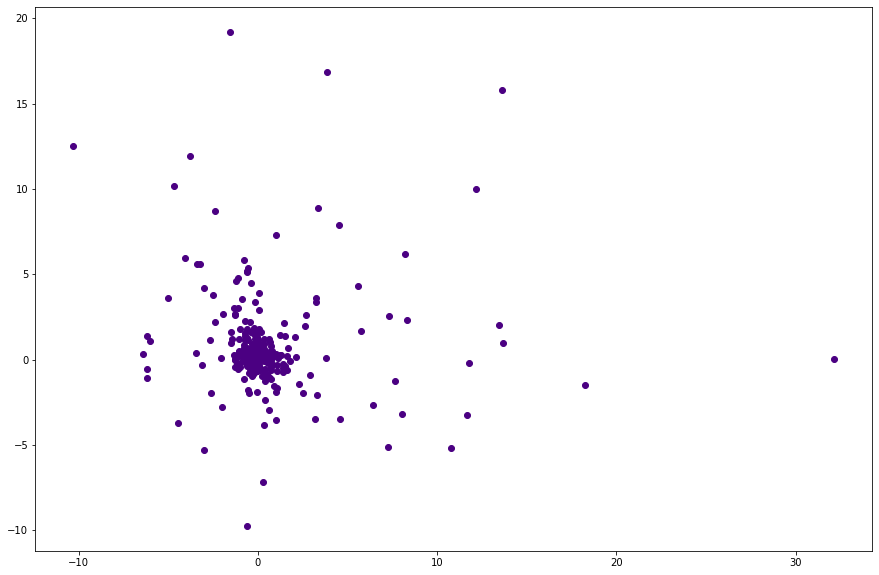

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
x = [n[0] for n in lsa_for_graph]
y = [n[1] for n in lsa_for_graph]
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')

In [158]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 2)


x = [n[0] for n in lsa_all[100:-100]]
y = [n[1] for n in lsa_all[100:-100]]
x_first_100 = [n[0] for n in lsa_all[:100]]
y_first_100 = [n[1] for n in lsa_all[:100]]
x_last_100 = [n[0] for n in lsa_all[-100:]]
y_last_100 = [n[1] for n in lsa_all[-100:]]

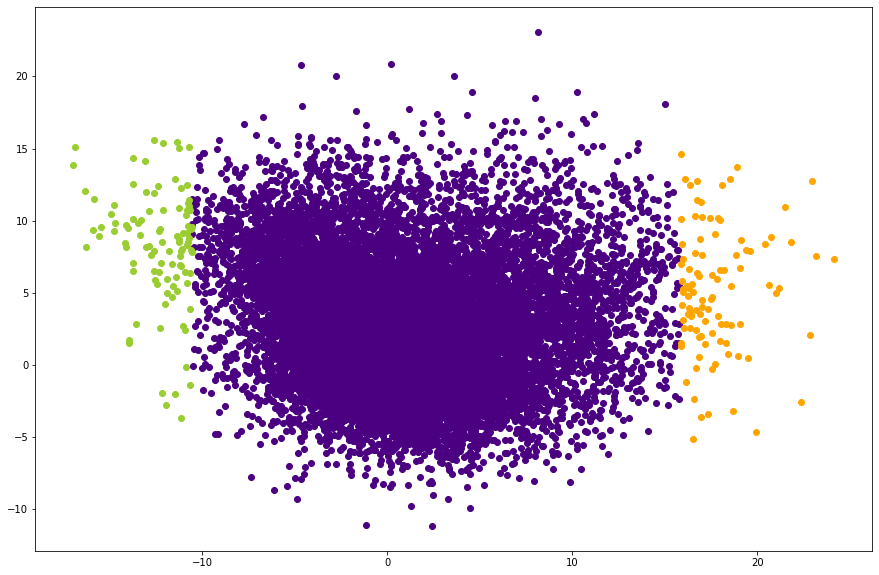

In [159]:
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')
plt.scatter(x_first_100, y_first_100, color='#FFA500')
plt.scatter(x_last_100, y_last_100, color='#9ACD32')

Фиолетовые -- каждое двухсотое слово из отсортированного списка первой итерации, оранжевые -- первые сто слов этого же списка, зелёные -- последние сто слов этого же списка

In [162]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 4))
ax_3d = Axes3D(fig)
 
plt.show()

In [160]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 3)


x = [n[0] for n in lsa_all[100:-100]]
y = [n[1] for n in lsa_all[100:-100]]
z = [n[2] for n in lsa_all[100:-100]]
x_first_100 = [n[0] for n in lsa_all[:100]]
y_first_100 = [n[1] for n in lsa_all[:100]]
z_first_100 = [n[2] for n in lsa_all[:100]]
x_last_100 = [n[0] for n in lsa_all[-100:]]
y_last_100 = [n[1] for n in lsa_all[-100:]]
z_last_100 = [n[2] for n in lsa_all[-100:]]

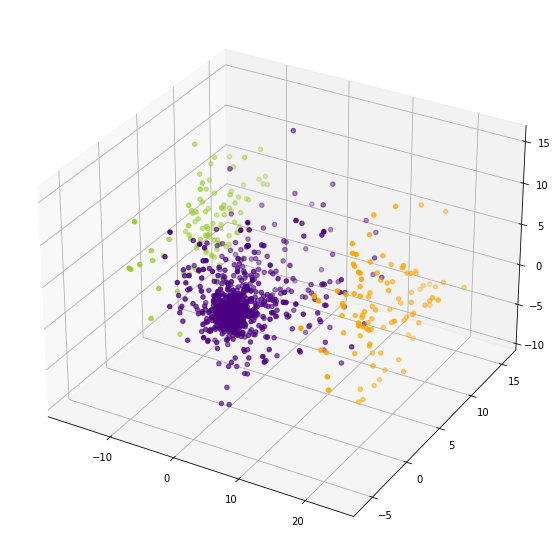

In [167]:
fig = plt.figure(figsize = (15, 10)) 

ax_3d = fig.add_subplot(projection='3d')

ax_3d.scatter(x[::50], y[::50], z[::50], color='#4B0082')
ax_3d.scatter(x_first_100, y_first_100, z_first_100, color='#FFA500')
ax_3d.scatter(x_last_100, y_last_100, z_last_100, color='#9ACD32')